# Report for Project 3 - Udacity Deep Reinforcement Learning Nanodegree

This notebook contains problem definition, solution and some analysis for the thrid project of Udacity's DRL Nanodegree


## Playing Tennis with MADDPG


![Screenshot of Tennis](Images/Tennis-Solved.gif)

## 0. Load Data and Helpers

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

import seaborn as sns
sns.set(style='whitegrid', context='notebook', palette='icefire')

%matplotlib inline

In [2]:
def load_scores(file_name):
  with open(file_name, 'rb') as f:
    return pickle.load(f)

In [3]:
def plot(rewards1, rewards2, N = 100):
  plt.figure(figsize=(20, 15))
  plt.subplot(311)
  plt.title('Blue Agent Scores')
  
  plt.plot(rewards1, 'lightcyan')
  
  if len(rewards1)>110:
    moving_average = np.convolve(rewards1, np.ones((N,))/N, mode='valid')
    plt.plot(range(int(N/2), len(moving_average)+int(N/2)), moving_average, color='blue', label="Moving Average 1" )
  plt.axhline(y=0.5, color='gold', linestyle='-.', label="Solved")

  plt.subplot(312)
  plt.title('Red Agent Scores')
  
  plt.plot(rewards1, 'mistyrose')
    
  if len(rewards2)>110:
    moving_average = np.convolve(rewards2, np.ones((N,))/N, mode='valid')
    plt.plot(range(int(N/2), len(moving_average)+int(N/2)), moving_average, color='red', label="Moving Average 2" )
  
  plt.axhline(y=0.5, color='gold', linestyle='-.', label="Solved")
  
  
  plt.subplot(313)
  plt.title('Episode Score (Max over both Agents)')
  
  plt.plot([max(a, b) for a, b in zip(rewards1, rewards2)], 'palegreen')
    
  if len(rewards2)>110:
    moving_average = np.convolve(rewards2, np.ones((N,))/N, mode='valid')
    plt.plot(range(int(N/2), len(moving_average)+int(N/2)), moving_average, color='green', label="Moving Average" )
  
  plt.axhline(y=0.5, color='gold', linestyle='-.', label="Solved")
  
  plt.show()

In [4]:
blue_score_files = sorted(glob('Benchmark/1000-RunScores1-*.pkl'))
red_score_files  = sorted(glob('Benchmark/1000-RunScores2-*.pkl'))

In [5]:
blue_scores = [load_scores(s) for s in blue_score_files]
red_scores  = [load_scores(s) for s in red_score_files]

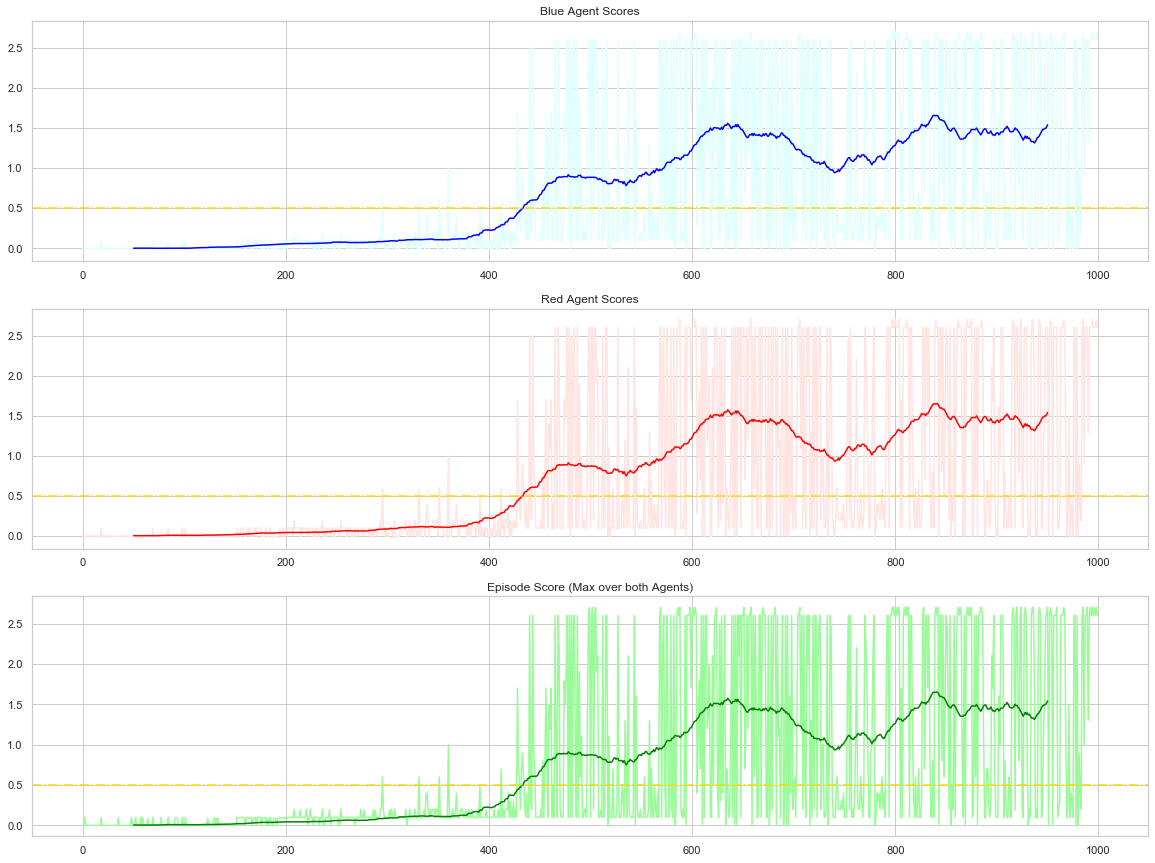

In [6]:
plot(blue_scores[1], red_scores[1])

## 1. Problem Formulation

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of ``+0.1``. If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of ``-0.01``. Thus, the goal of each agent is to keep the ball in play.

The observation space consists of ``8`` variables corresponding to the ``position`` and ``velocity`` of the ``ball`` and ``racket``. Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping.

### State Space

The observation space consists of ``24`` variables corresponding to position, rotation, velocity, and angular velocities of the arm. A sample observation for one of the  agents looks like this :

```python
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        
 ```

### Action Space

Each action is a vector with ``2`` numbers, corresponding to velocity applicable to the racket. Every entry in the action vector should be a number between ``-1`` and ``1``.

### Solve Criteria

The task is episodic, and the score for one episode is the maximum score between two agents. In order to solve the environment, agents must get an average score of ``+0.5`` (over ``100`` consecutive episodes, after taking the maximum over both agents).


## 2. Experiments and Algorithm Overview

In this section, a brief overview of MADDPG are described.


----


## 2.1 Multi-Agent Deep Determinist Policy Gradient (MADDPG)





**Table of Parameters**

| Parameter           	| Value                                                                                      	|
|---------------------	|----------------------------------------------------------------------------------------------	|
| $s \in S$          	| $s$ Denotes a state.                                                                         	|
| $a \in A$          	| $a$ Denotes an action.                                                                       	|
|$R$                	| Reward.                                                                                    	|
| $\gamma$           	| Discount Factor.                                                                          	|
| $\alpha$           	| Learning Rate.                                                                             	|
| $J(w)$            	| Loss function.                                                                            	|
| $w$           	| Weights for target Q Network.                                                                  	|
| $w^{-}$               	| Weights for current (local) Q Network.                                                  	|
|$Q(s, a)$     	        | Action-value function, How good is to take action $a$ in state $s$. 	                        |




### How it Works

MADDPG is DDPG with one neat trick, shared states in the Critic network. In the multi-agents environment, for an agent to have meaningful interaction, it is needed to explicitly create a communication channel, or feed agents some common (shared) perception of the word and the value of each state/action. 

Remember we need to train agents that in the test time, each individual receives a local observation of state and outputs an action; But we are free to add more signals in the training phase. In this direction, in MADDPG, each agent have a Critic network, which shares some information with other agents, it receives states and actions from all the other agents. (This is only needed in training)


![MADDPG](Images/nipsdiagram.gif)



**Algorithm PseudoCode**

![MADDPG](Images/maddpg-algorihm.png)






### Network Topology

![MADDPG](Images/Network.png)


### Best Score for MADDPG




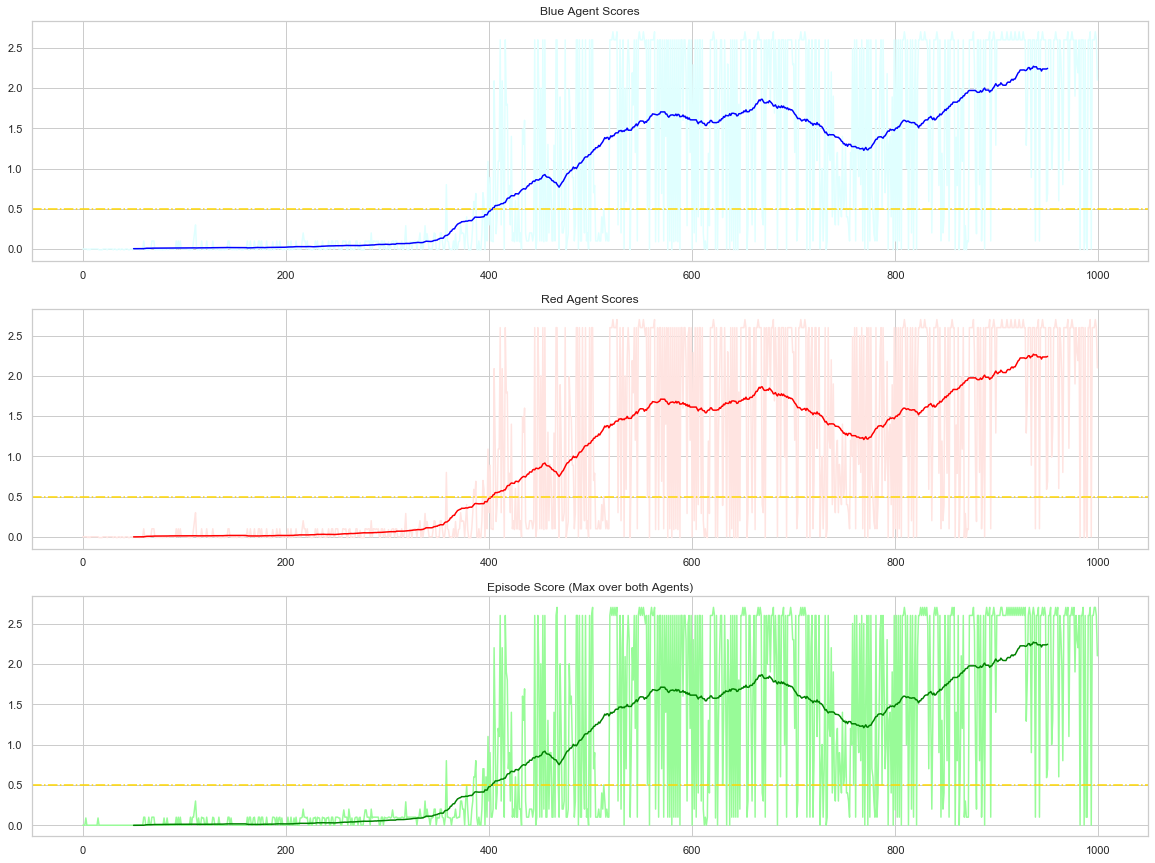

In [7]:
plot(blue_scores[3], red_scores[3])

----

# 3. Benchmark Results

## 3.1 Benchmark Results

Reinforcement Learning with multiple agents is extremely noisy and unstable. In some runs, the algorithm can find a good solution in the first few hundred episodes, in some other cases it can find a solution at all. For showing this, ``5`` different execution with same seed ran, and the results are shown in the bellow:

### Parameters:



| Parameter           	| Value                                                                                      	|
|---------------------	|----------------------------------------------------------------------------------------------	|
| Episode Length      	| ``1000``                                                                                   	|
| Runs per Algorithm  	| ``5``                                                                                      	|
| Seed                	| ``0``                                                                                      	|


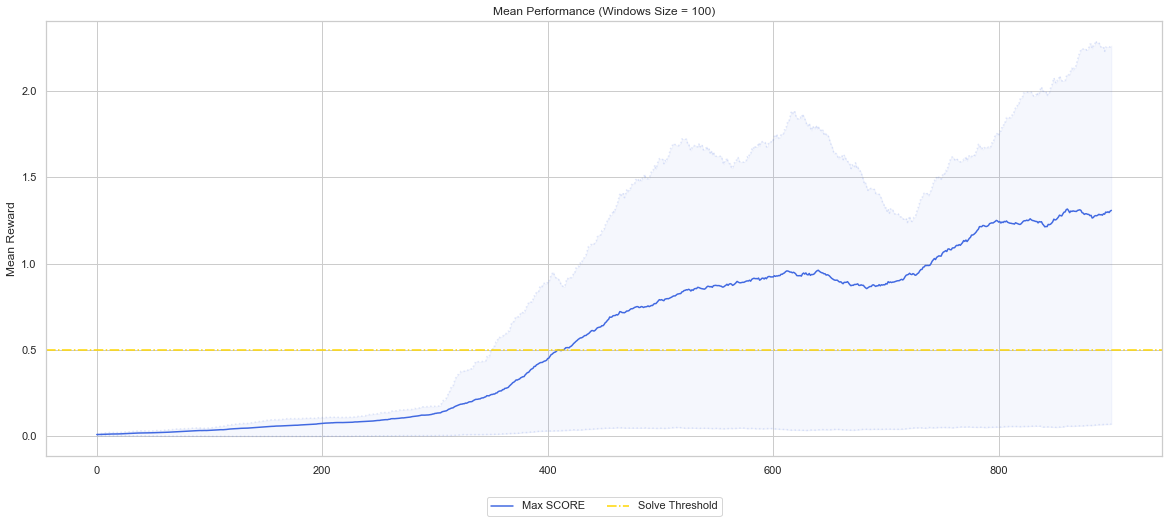

In [8]:
sns.set(style='whitegrid', context='notebook', palette='icefire')
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

N = 100

colors = ['royalblue']
labels = ['Max SCORE']

joined = np.array([np.asarray(blue_scores), np.asarray(red_scores)]).reshape(2, 6*1000)
max_over_two_agents = np.maximum(joined[0], joined[1]).reshape(6, 1000)

for i, S in enumerate([max_over_two_agents]):
  moving_average  = [np.convolve(t, np.ones((N,))/N, mode='valid') for t in S] 

  x1 = np.asarray(moving_average).mean(axis=0)
  x2 = np.asarray(moving_average).max(axis=0)
  x3 = np.asarray(moving_average).min(axis=0)

  plt.plot(x1, color=colors[i], label=labels[i])
  plt.plot(x2, color=colors[i], alpha=0.15, linestyle=':')
  plt.plot(x3, color=colors[i], alpha=0.15, linestyle=':')

  plt.fill_between(range(len(x1)), x2, x3, alpha=0.05, color=colors[i])

plt.ylabel('Mean Reward')
plt.axhline(y=0.5, color='gold', linestyle='-.', label="Solve Threshold")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title("Mean Performance (Windows Size = 100)")
plt.show()  

### OU Noise is Important

An OU Noise process and the good parameter is essential for converging for this environment. In the last project, my DDPG implementation used normal noise only, (as it was advertised in the paper as an alternative). The current implementation of my MADDPG without OU Noise having a very hard time to converge and it can't solve the problem.


![Normal Noise](Images/normal-noise.png)

# 4. Agents in Action

The ``movies`` folder contains a record of each successful algorithm. 


Full length video can be found here: ``movies/Solved.mp4``

### Average Ball Position for 5 Episodes: 

![Screenshot of Reacher](Images/Average-with-BG.png)


In [9]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="//www.youtube.com/embed/2zeY2X5Njug" frameborder="0" allowfullscreen></iframe>')

/Users/taesiri/miniconda3/envs/deep36/lib/python3.6/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# 5. Ideas for Future Work


1. Due to the nature of the environment, some states are rare to occur in the first few hundred episodes. Like when a racket hits a ball and the other racket hist it back, the velocity and the position of the ball is not something that the agents observed before. For tackling this, priority experience reply PER seems to a promising direction. 
1. MADDPG is DDPG with some shared states in the Critic model, We can implement a similar concept for the PPO algorithm and making MAPPO. The raw PPO algorithm having a hard time converging (see the plot bellow), we suspect adding shared states in the Critic model can help to solve this environment with PPO.


![MADDPG](Images/ppo.png)


3. In MADDP, multiple other strategies for learning are proposed. For example, each agent can estimate other agents' actions, each agent can sample from a distribution of policies. In future work, either of these solutions can be implemented and tested.

# 6. Sources

1. Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments [[Arixv](https://arxiv.org/abs/1706.02275)]
1. Learning to Cooperate, Compete, and Communicate [[OpenAI Blog](https://openai.com/blog/learning-to-cooperate-compete-and-communicate/)]

Image for MADDP algorithm taken from the corresponding paper and openAI's blog post.